# Imports

In [1]:
from plot_utils import *
import seaborn as sns

%matplotlib inline

## Load Survey Data (Pilot)

In [2]:
df_pilot = pd.read_csv('data/pilot_data_cleaned.csv')
df_pilot.Start = pd.to_datetime(df_pilot.Start.values)
df_pilot.End = pd.to_datetime(df_pilot.End.values)
df_pilot['duration_in_minutes'] = round((df_pilot.End-df_pilot.Start).astype('timedelta64[s]')/60.,2)

## Pilot Participation Plot

In [3]:
df2 = df_pilot.groupby(by=['ID','Type']).size().reset_index()[['ID','Type']]\
    .groupby(by='Type').size().reset_index().rename(columns={0:'total', 'Type':'treatment'})
df2.replace({"treatment":{'C':'Control', 'T':'Typographical', 'P':'Phonological'}}, inplace=True)

p = participant_count_plot(df2)
p.save('participant_count_pilot.html')

## Load Survey Day (Experiment)

In [4]:
df = pd.read_csv('data/results_cleaned_04092021.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Start Date'] = pd.to_datetime(df['Start Date'].values)

## Live Study Participation Plot

In [6]:
# live study participation bar chart
p = participant_count_plot_live(df)
p.save('participant_count_live.html')
#p

# Demographics Analysis

In [6]:
rend = get_missing_demographics(df)

with open("missing_demographic_data.html","w") as f:
    f.write(rend.render()) # df is the styled dataframe
    f.close()
#rend

In [10]:
# generate plot for "good" year data
p = get_good_demographic_year(df)
p.save('demographic_year_goodonly.html')
#p

In [12]:
# generate gender plot
p = get_demographic_gender(df)
p.save('demographic_gender.html')
#p

In [13]:
# generate country plot
p = get_demographic_country(df)
p.save('demographic_country.html')
#p

In [9]:
p = get_demographic_state(df)
p.save('demographic_state.html')
#p

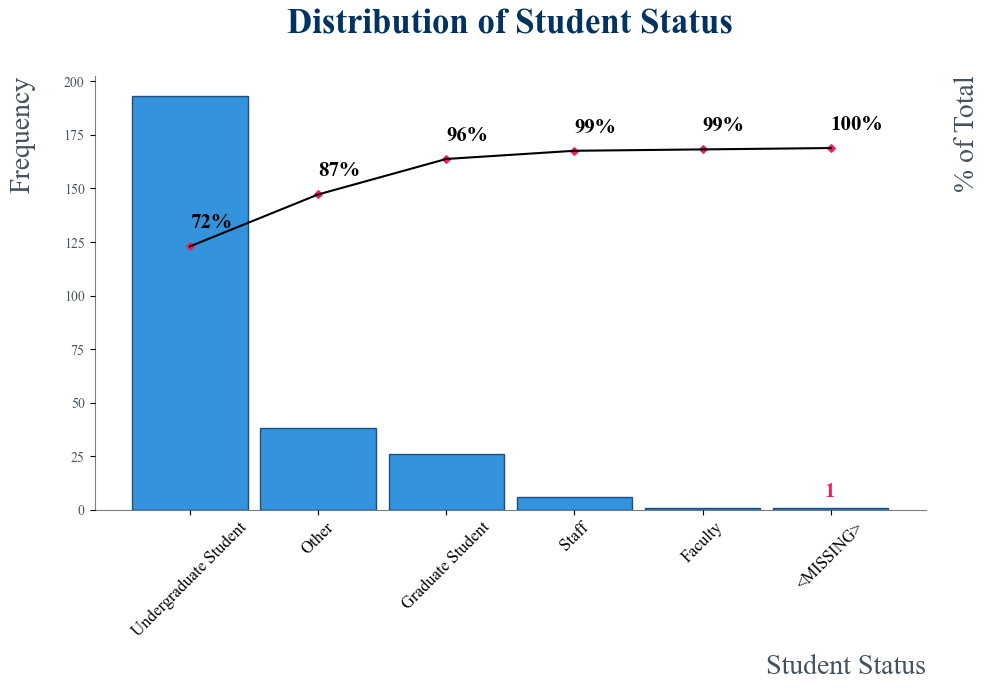

In [11]:
p = get_demographic_student_status(df)
p.savefig("demographic_student.png", dpi=300)
#p.show()

# Survey Response Data Analysis

In [ ]:
# get descriptive statistics for main survey data (Amazon Mechanical Turk)
cols = ['PromptTime','QuestionTime','wpm','Interest','Effective','Intelligence','Writing','Meet']
rend = get_descriptive_statistics(df[(df['Start Date'] < '2021-04-05')], cols)

with open("descriptive_statistics_amazon.html","w") as f:
    f.write(rend.render()) # df is the styled dataframe
    f.close()

# get descriptive statistics for main survey data (Berkeley XLab)
rend = get_descriptive_statistics(df[(df['Start Date'] > '2021-04-05')], cols)

with open("descriptive_statistics_xlab.html","w") as f:
    f.write(rend.render()) # df is the styled dataframe
    f.close()

In [ ]:
# generate Likert variance plot
p = get_likert_variance(df)
p.save('likert_variance.html')
#p

In [5]:
# generate likert counts by group
p = get_likert_counts_by_group(df)
p.save('likert_group_counts.html')
#p

In [5]:
# generate WPM plot by group
p = get_wpm_plot(df)
p.save('wpm_by_group.html')
#p

## Generate Divergence Plots (XLab Only)

In [34]:
df2 = get_divergence_data(df[(df['Start Date'] > "2021-04-05")])

c1 = macro_diverge_plot(df2, "effective", "") #"Did the author effectively communicate their message?")
c2 = macro_diverge_plot(df2, "writing", "") # "Do you think this author has strong writing skills?") 
c3 = macro_diverge_plot(df2, "intelligence", "") #"What is your judgment of the author's level of intelligence?")

c1.save('divergence_effective.html')
c2.save('divergence_writing.html')
c3.save('divergence_intelligence.html')